In [29]:
%matplotlib inline

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(42)

In [61]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [62]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train = X_train.reshape(-1, 784) #-1은 전 거랑 호환이 되도록 넘파이가 알아서 계산해주세여 라는 의미
X_test = X_test.reshape(-1, 784)

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

input_shape = X_train.shape[1:]

In [18]:
model = Sequential()
model.add(Dense(16, input_shape = input_shape, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
from keras import regularizers

model = Sequential()
model.add(Dense(16, input_shape = input_shape, activation='sigmoid',
               kernel_regularizer=regularizers.l2(0.1),
               activity_regularizer=regularizers.l1(0.1)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [43]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(16, input_shape = input_shape, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [44]:
model.fit(X_train, Y_train, epochs=100, verbose=1, batch_size=32, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 3s 65us/step - loss: 2.2813 - acc: 0.1569 - val_loss: 2.2364 - val_acc: 0.3307
Epoch 2/100
45000/45000 [==============================] - 2s 51us/step - loss: 2.1807 - acc: 0.3191 - val_loss: 2.0940 - val_acc: 0.4189
Epoch 3/100
45000/45000 [==============================] - 2s 53us/step - loss: 1.9868 - acc: 0.4237 - val_loss: 1.8258 - val_acc: 0.5131
Epoch 4/100
45000/45000 [==============================] - 3s 58us/step - loss: 1.7197 - acc: 0.4953 - val_loss: 1.5288 - val_acc: 0.6047
Epoch 5/100
45000/45000 [==============================] - 3s 62us/step - loss: 1.4735 - acc: 0.5560 - val_loss: 1.2885 - val_acc: 0.6513
Epoch 6/100
45000/45000 [==============================] - 3s 70us/step - loss: 1.2878 - acc: 0.6068 - val_loss: 1.1128 - val_acc: 0.7107
Epoch 7/100
45000/45000 [==============================] - 4s 83us/step - loss: 1.1544 - acc: 0.6442 - val_loss: 0.9830 - 

45000/45000 [==============================] - 3s 63us/step - loss: 0.4431 - acc: 0.8651 - val_loss: 0.3049 - val_acc: 0.9146
Epoch 60/100
45000/45000 [==============================] - 4s 79us/step - loss: 0.4431 - acc: 0.8655 - val_loss: 0.3021 - val_acc: 0.9157
Epoch 61/100
45000/45000 [==============================] - 4s 79us/step - loss: 0.4370 - acc: 0.8667 - val_loss: 0.3020 - val_acc: 0.9151
Epoch 62/100
45000/45000 [==============================] - 3s 71us/step - loss: 0.4363 - acc: 0.8661 - val_loss: 0.3001 - val_acc: 0.9164
Epoch 63/100
45000/45000 [==============================] - 3s 73us/step - loss: 0.4332 - acc: 0.8690 - val_loss: 0.2979 - val_acc: 0.9169
Epoch 64/100
45000/45000 [==============================] - 3s 74us/step - loss: 0.4300 - acc: 0.8687 - val_loss: 0.2981 - val_acc: 0.9164
Epoch 65/100
45000/45000 [==============================] - 3s 76us/step - loss: 0.4323 - acc: 0.8698 - val_loss: 0.2950 - val_acc: 0.9181
Epoch 66/100
45000/45000 [==============

In [39]:
mev = model.evaluate(X_test, Y_test, verbose=1)

print('Test loss: ', mev[0], 'accuracy: ', mev[1])

10000/10000 [==============================] - 0s 39us/step
Test loss:  2.320127284240723 accuracy:  0.101


[[0.10210951 0.10421055 0.10054464 0.10621414 0.09532657 0.09356301
  0.09372699 0.10397591 0.10040878 0.09992   ]]
3
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


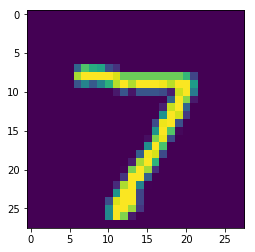

In [40]:
#predict
rst = model.predict(X_test[0:1])
print(rst)
print(np.argmax(rst))
print(Y_test[0])
plt.imshow(X_test[0].reshape(28,28))

In [54]:
def getModel(input_shape, dropout_rate='0.25', optimizer='adam'):

    model = Sequential()
    model.add(Dense(16, input_shape = input_shape, activation='sigmoid'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

return model

In [55]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=getModel, epochs=100, batch_size=32,
                       verbose=1, input_shape=input_shape)

In [56]:
from sklearn.model_selection import GridSearchCV

dropout_rate = [0.1, 0.2, 0.25, 0.5]
param_grid = dict(dropout_rate = dropout_rate)

In [57]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, Y_train)

AttributeError: 'NoneType' object has no attribute 'loss'

emsemble

model1

In [66]:
i1 = input(shape=(784,))
m1 = Dense(16, activation='sigmoid')(i1)
m1 = Dense(32, activation='sigmoid')(m1)
model1 = Model(inputs=i1, outputs=m1)

TypeError: raw_input() got an unexpected keyword argument 'shape'